<a href="https://www.kaggle.com/code/simronw/hypertension-risk-prediction-model?scriptVersionId=181691746" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

***Let's connect on*** [Linkedin](https://www.linkedin.com/in/simronwaskar/)

# **Hypertension Risk Prediction Model** 

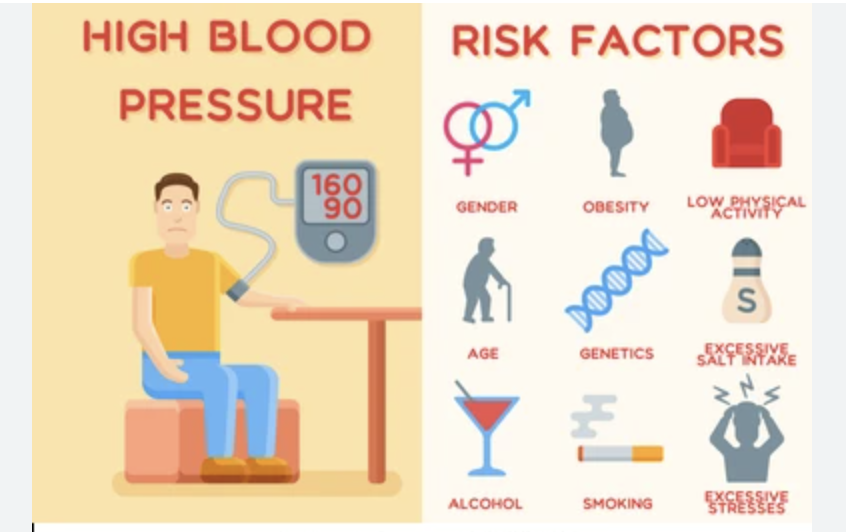

# **Importing libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hypertension-risk-model-main/Hypertension-risk-model-main.csv


# **Loading dataset into pandas dataframe**

In [2]:
# Importing the dataset into Pandas DataFrame
df = pd.read_csv("/kaggle/input/hypertension-risk-model-main/Hypertension-risk-model-main.csv")

In [3]:
# Displaying first 10 rows of the dataset
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Explore the data** 

In [4]:
# Displaying datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [5]:
# Displaying the Statistical summary of numerical columns
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.310613
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.462799
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# Number of rows and columns
df.shape

(4240, 13)

In [7]:
# Checking for null values in the dataset
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [8]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().mean() * 100
print(missing_values)

male             0.000000
age              0.000000
currentSmoker    0.000000
cigsPerDay       0.683962
BPMeds           1.250000
diabetes         0.000000
totChol          1.179245
sysBP            0.000000
diaBP            0.000000
BMI              0.448113
heartRate        0.023585
glucose          9.150943
Risk             0.000000
dtype: float64


In [9]:
# Fill missing values with mean or median
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

/tmp/ipykernel_18/1874870040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
/tmp/ipykernel_18/1874870040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# **Exploratory data analysis**

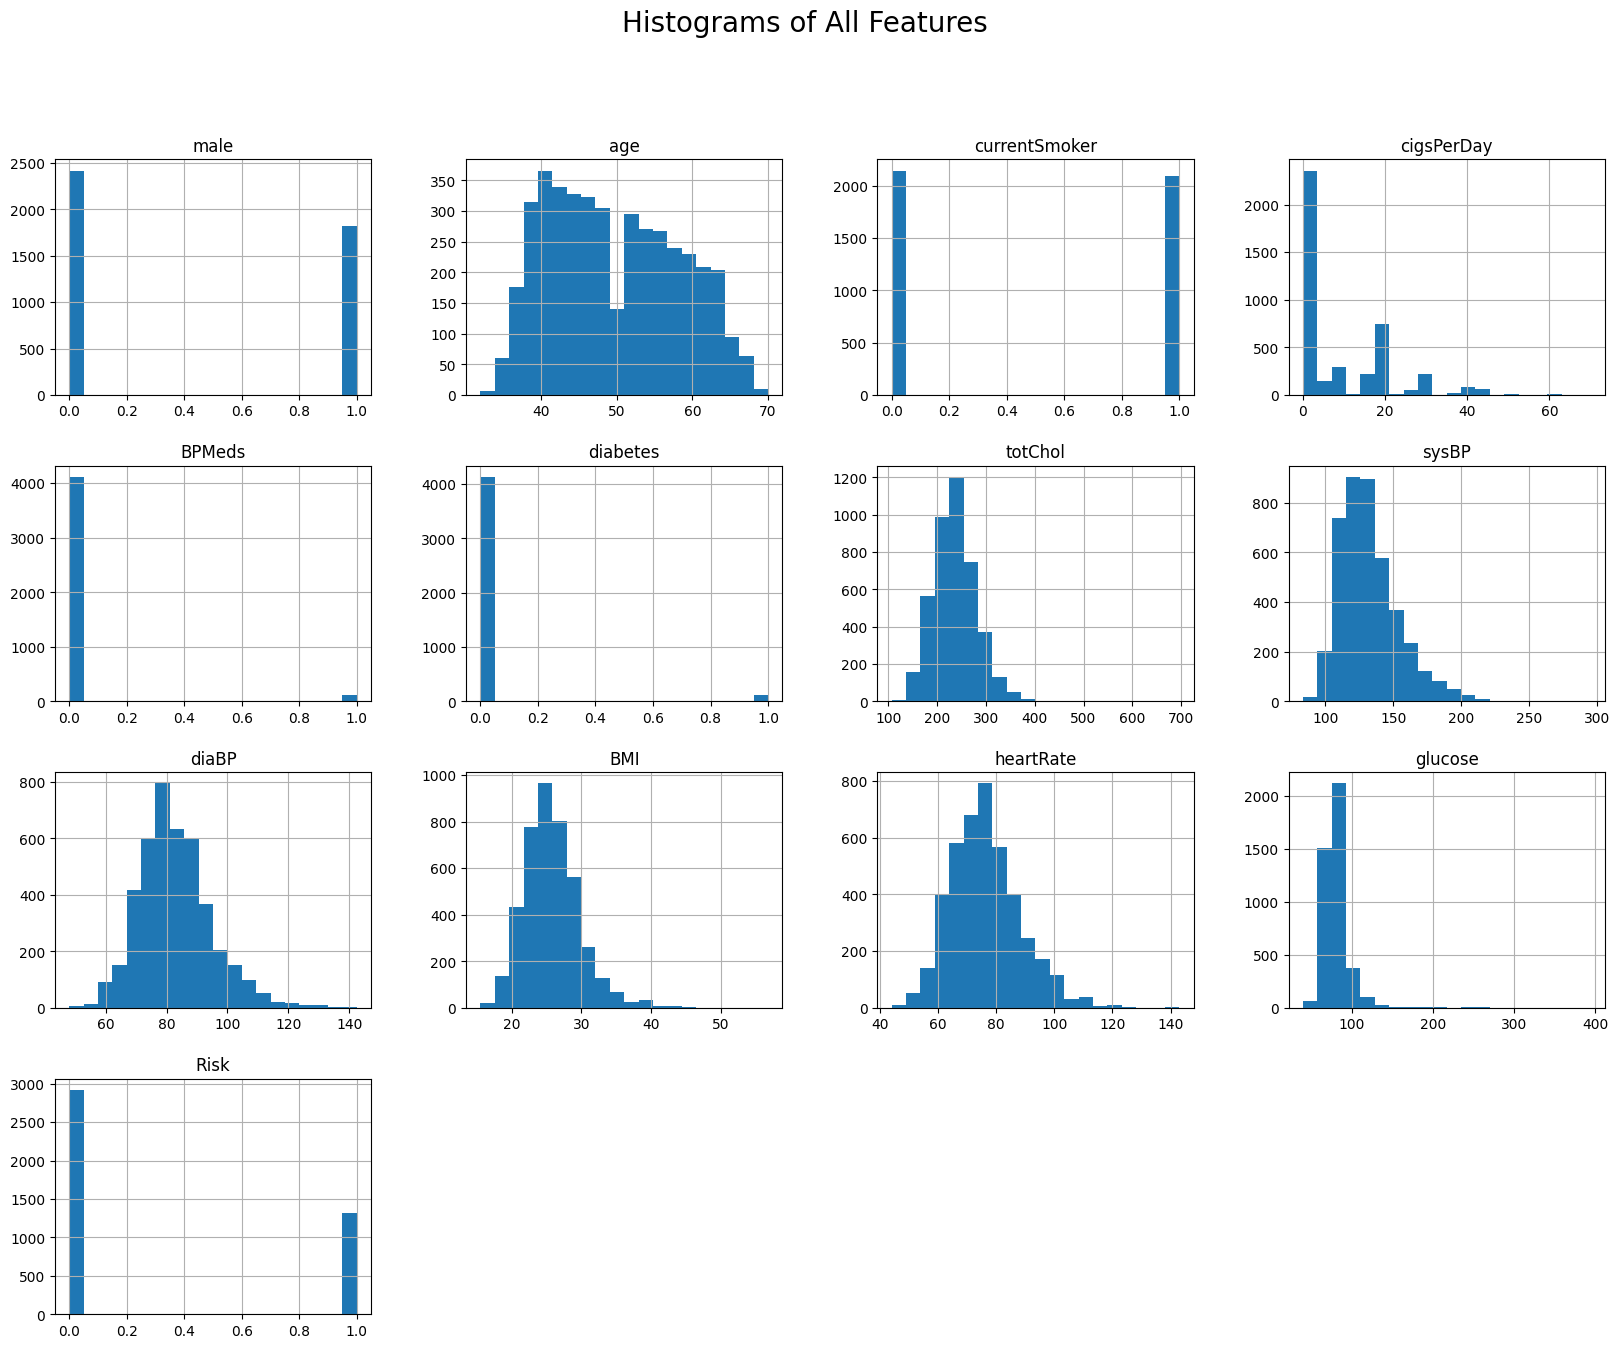

In [10]:
# Histograms of all features
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Features', fontsize=20)
plt.show()


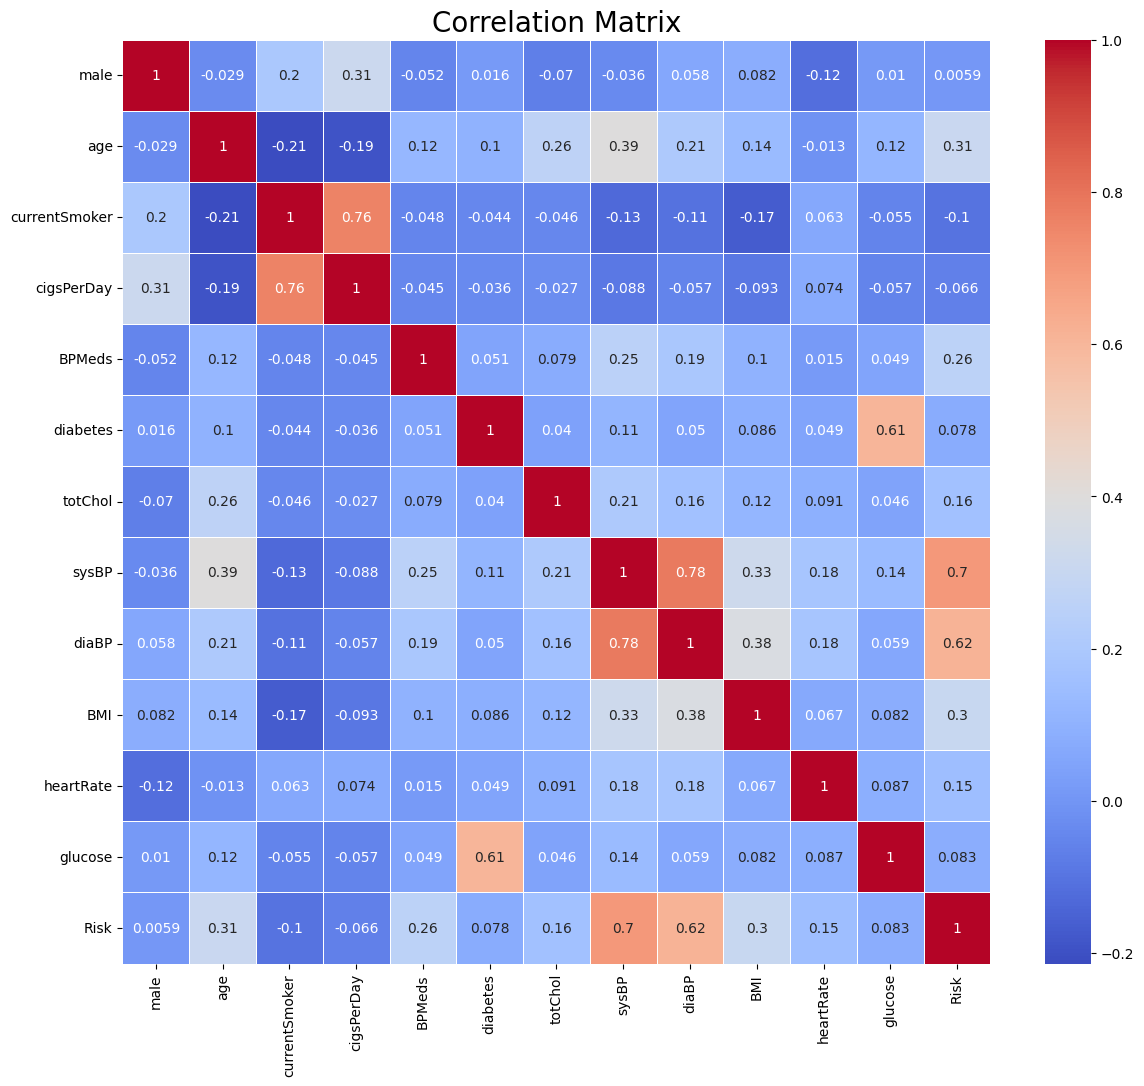

In [11]:
# Correlation matrix
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

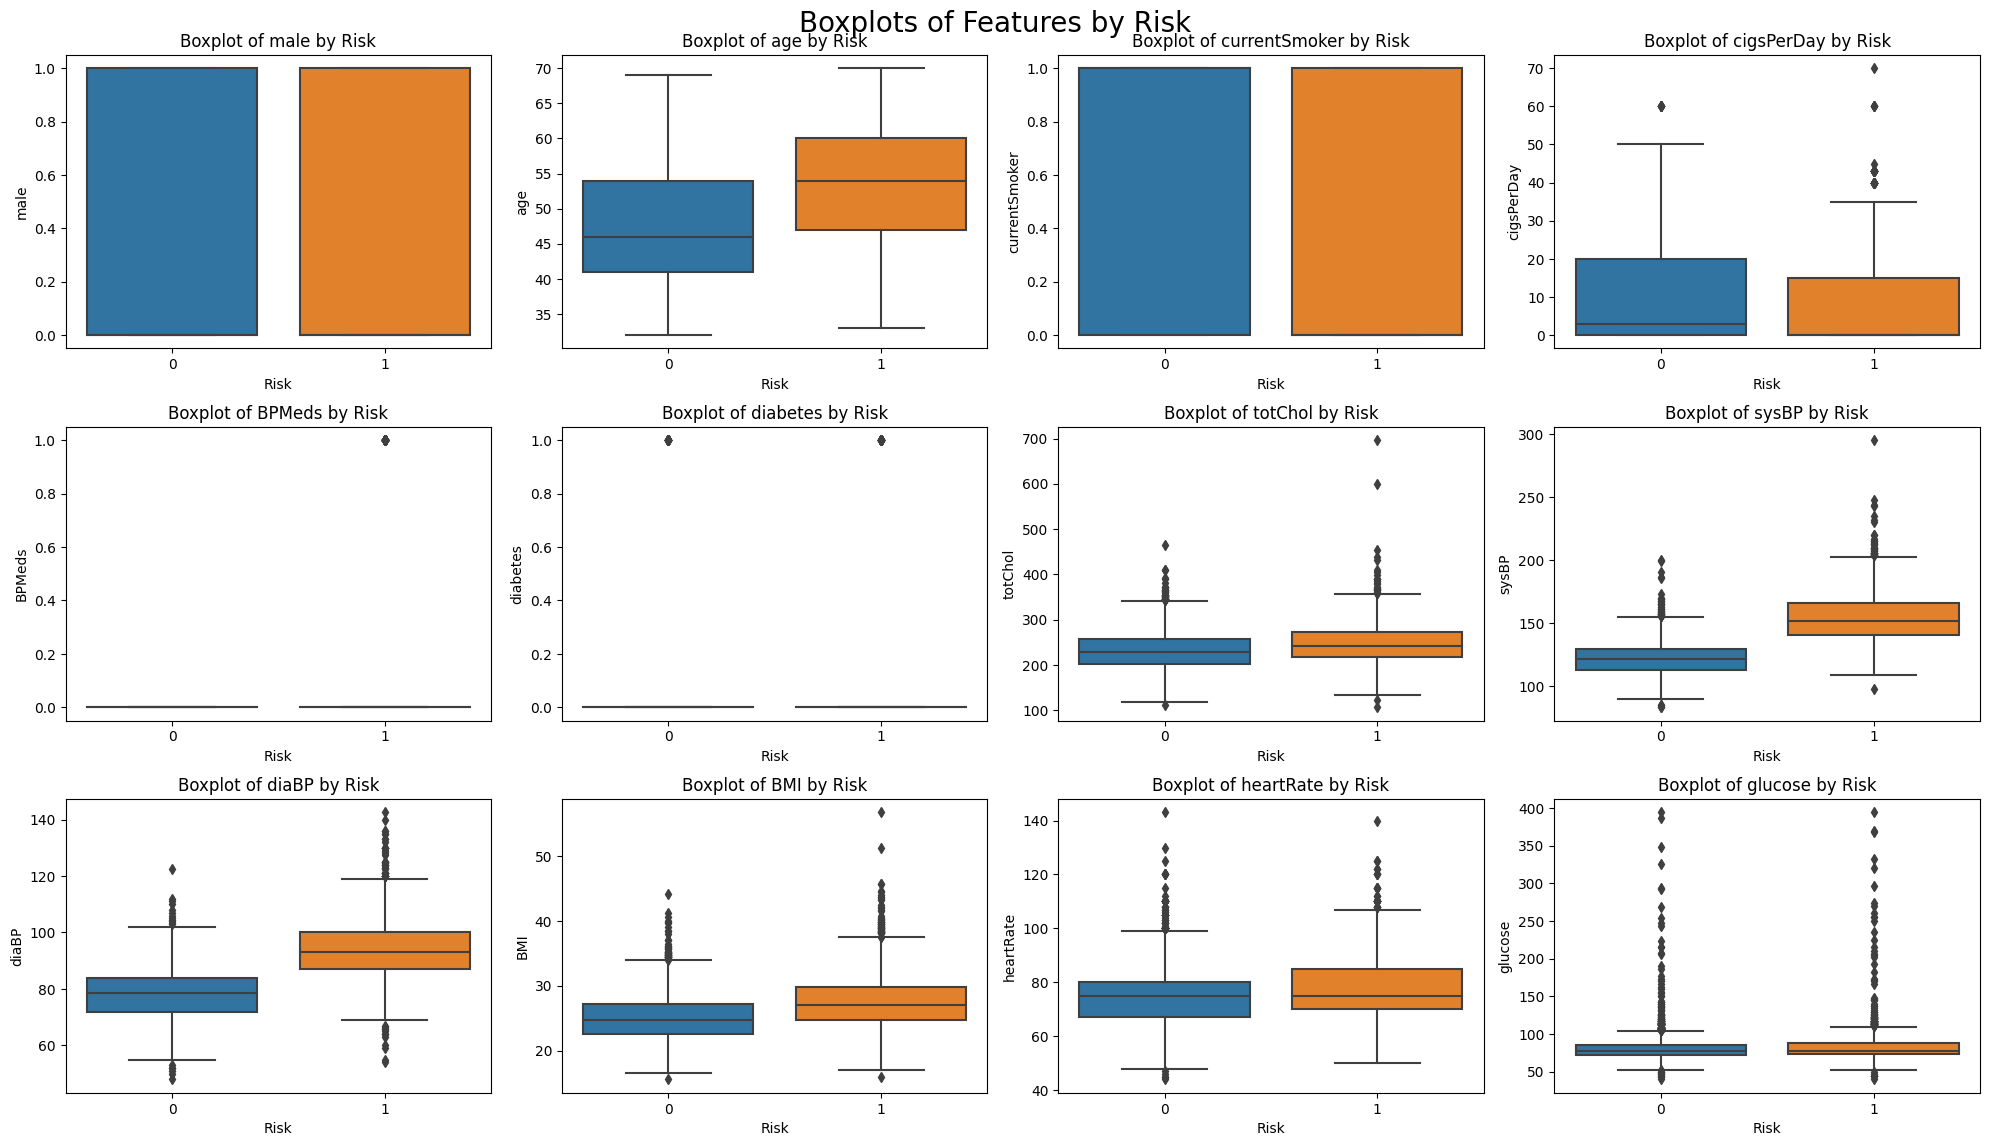

In [12]:
# Boxplots of features by target variable (Risk)
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.drop('Risk', axis=1).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Risk', y=column, data=df)
    plt.title(f'Boxplot of {column} by Risk')
plt.tight_layout()
plt.suptitle('Boxplots of Features by Risk', fontsize=20)
plt.subplots_adjust(top=0.95)
plt.show()

# **Splitting the dataset**

In [13]:
# Split dataset into features and labels
X = df.drop('Risk', axis=1)
y = df['Risk']

In [14]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalize/scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Training the model using Random Forest Claasifier**

In [16]:
# Initialize and train model (using Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Predicting the model**

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# **Evaluating the model**

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [19]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.90
Precision: 0.81
Recall: 0.88
F1 Score: 0.84
ROC AUC Score: 0.89


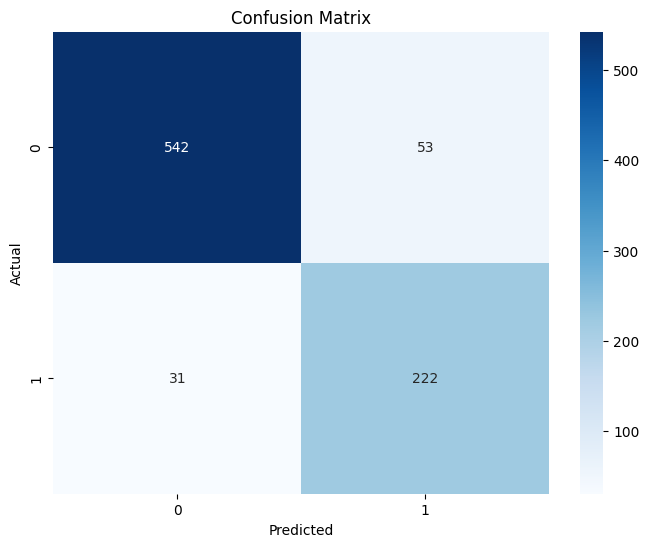

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

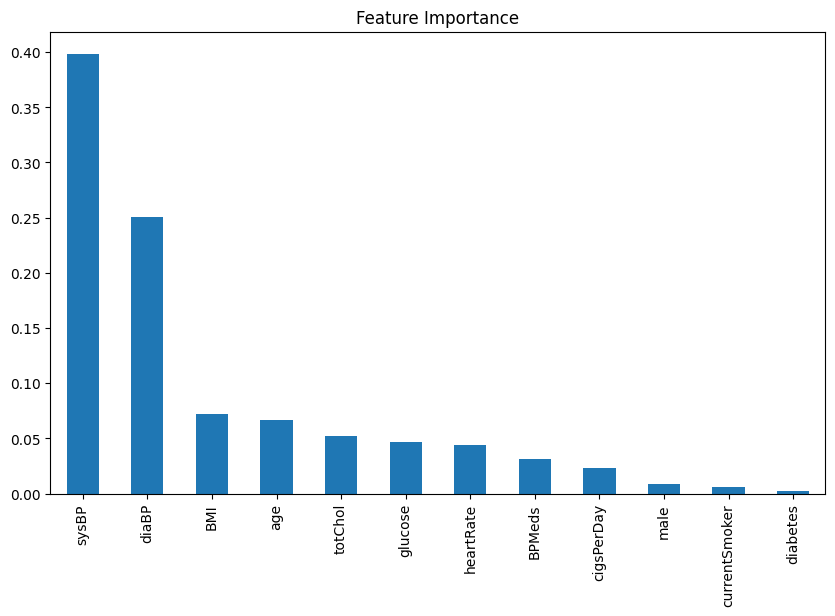

In [21]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()